In [22]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

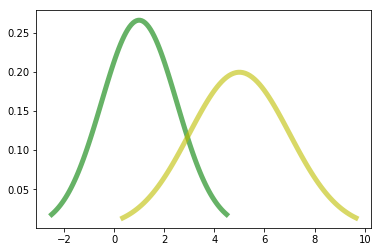

In [21]:
first = scipy.stats.norm(loc=1,scale=1.5)
second = scipy.stats.norm(loc=5,scale=2)

samples_first = np.linspace(first.ppf(0.01), first.ppf(0.99), 100)
samples_second = np.linspace(second.ppf(0.01), second.ppf(0.99), 100)

plt.plot(samples_first, first.pdf(samples_first),'g-', lw=5, alpha=0.6, label='norm pdf')
plt.plot(samples_second, second.pdf(samples_second),'y-', lw=5, alpha=0.6, label='norm pdf')
plt.show()

In [23]:
# probability that the random variable belons to first class

P_1 = 0.8
P_2 = 0.2

In [16]:
our_point = 4

if (first.pdf(our_point) * P_1 > second.pdf(our_point) * (1 - P_2)):
    print("First class")
else:
    print("Second class")

Second class


In [17]:
first_func = lambda x : first.pdf(x) * P_1
second_func = lambda x: second.pdf(x) * (1 - P_2)

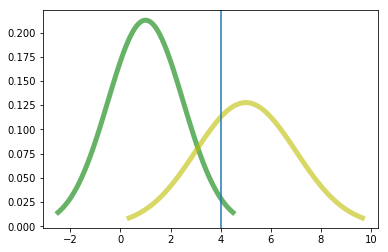

In [24]:
plt.plot(samples_first, first_func(samples_first),'g-', lw=5, alpha=0.6, label='norm pdf')
plt.plot(samples_second, second_func(samples_second) * (1 - P_2),'y-', lw=5, alpha=0.6, label='norm pdf')
plt.axvline(x=our_point)
plt.show()

In [19]:
from scipy import integrate

In [20]:
false_alert_zone = integrate.quad(second_func, -np.inf, our_point)[0]
false_detection_zone = integrate.quad(first_func, our_point, np.inf)[0]
total_classification_error = false_alert_zone + false_detection_zone
print("Зона ложной тревоги: {}\nЗона пропуска обнаружения: {}\nСуммарная ошибка классификации: {}".format(
                                        false_alert_zone, false_detection_zone, total_classification_error))

Зона ложной тревоги: 0.24683003098078954
Зона пропуска обнаружения: 0.018200105558543372
Суммарная ошибка классификации: 0.26503013653933294
